# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams as screen_size
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading dataset & EDA

In [2]:
data = pd.read_csv ('D://Datasets//tips.csv')

In [3]:
data.head ()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.describe ()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
data.shape

(244, 7)

In [7]:
print (f'Columns: {data.columns}')

Columns: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [8]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
data.isna ().sum ()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
sex_unique = data ['sex'].unique () 

In [11]:
data ['sex'].replace (sex_unique, [0, 1], inplace=True)
data.head (3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3


In [12]:
print (data ['smoker'].nunique ())
print (data ['smoker'].unique ())

2
['No' 'Yes']


In [13]:
data ['smoker'].replace (['No', 'Yes'], [0, 1], inplace=True)
data.head (3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,Sun,Dinner,2
1,10.34,1.66,1,0,Sun,Dinner,3
2,21.01,3.50,1,0,Sun,Dinner,3


In [14]:
n_u = data ['day'].nunique ()
un = data ['day'].unique ()
print (n_u, '\n', un)

4 
 ['Sun' 'Sat' 'Thur' 'Fri']


In [15]:
data ['day'].replace (un, range (0, 4), inplace=True)

In [16]:
data.head (3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,Dinner,2
1,10.34,1.66,1,0,0,Dinner,3
2,21.01,3.50,1,0,0,Dinner,3


In [17]:
t = data ['time'].unique ()
print (t)


['Dinner' 'Lunch']


In [18]:
data ['time'].replace (t, [0, 1], inplace=True)
data.head (3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,0,2
1,10.34,1.66,1,0,0,0,3
2,21.01,3.50,1,0,0,0,3


In [19]:
data.dtypes

total_bill    float64
tip           float64
sex             int64
smoker          int64
day             int64
time            int64
size            int64
dtype: object

In [20]:
corr = data.corr ()
display (corr)

,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.175312,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.138947,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.215374,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,0.170818,-0.054921,-0.133178
day,-0.175312,-0.138947,-0.215374,0.170818,1.000000,0.670470,-0.211750
time,-0.183118,-0.121629,-0.205231,-0.054921,0.670470,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,-0.211750,-0.103411,1.000000


In [21]:
display (corr.iloc [1:2, :])

,total_bill,tip,sex,smoker,day,time,size
tip,0.675734,1.0,0.088862,0.005929,-0.138947,-0.121629,0.489299


### Data Visualization

In [22]:
screen_size ['figure.figsize'] = (10, 2)

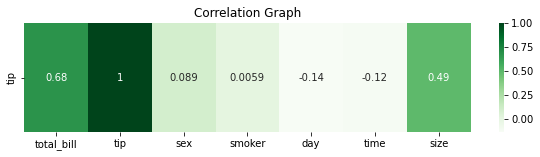

In [23]:
plt.title ('Correlation Graph')
sns.heatmap (corr.iloc [1:2, :], annot=True, cmap='Greens')
plt.show ()

### Regression Line 

In [24]:
corr_val = corr.iloc [1:2, :].values
print (corr_val)

[[ 0.67573411  1.          0.08886206  0.00592854 -0.13894712 -0.12162906
   0.48929878]]


In [25]:
sel_rel = [] #Selecting columns only if correlation is more than 0.6
sel_column = [] #Such columns
for i in range (len (corr_val)):
    if corr_val [0][i] > 0.6:
        sel_rel.append (corr_val [0][i])
        sel_column.append (i)

print (sel_rel)
print (sel_column)

[0.6757341092113648]
[0]


In [26]:
x = data.iloc [:, sel_column].values
print (x)

[[16.99]
 [10.34]
 [21.01]
 [23.68]
 [24.59]
 [25.29]
 [ 8.77]
 [26.88]
 [15.04]
 [14.78]
 [10.27]
 [35.26]
 [15.42]
 [18.43]
 [14.83]
 [21.58]
 [10.33]
 [16.29]
 [16.97]
 [20.65]
 [17.92]
 [20.29]
 [15.77]
 [39.42]
 [19.82]
 [17.81]
 [13.37]
 [12.69]
 [21.7 ]
 [19.65]
 [ 9.55]
 [18.35]
 [15.06]
 [20.69]
 [17.78]
 [24.06]
 [16.31]
 [16.93]
 [18.69]
 [31.27]
 [16.04]
 [17.46]
 [13.94]
 [ 9.68]
 [30.4 ]
 [18.29]
 [22.23]
 [32.4 ]
 [28.55]
 [18.04]
 [12.54]
 [10.29]
 [34.81]
 [ 9.94]
 [25.56]
 [19.49]
 [38.01]
 [26.41]
 [11.24]
 [48.27]
 [20.29]
 [13.81]
 [11.02]
 [18.29]
 [17.59]
 [20.08]
 [16.45]
 [ 3.07]
 [20.23]
 [15.01]
 [12.02]
 [17.07]
 [26.86]
 [25.28]
 [14.73]
 [10.51]
 [17.92]
 [27.2 ]
 [22.76]
 [17.29]
 [19.44]
 [16.66]
 [10.07]
 [32.68]
 [15.98]
 [34.83]
 [13.03]
 [18.28]
 [24.71]
 [21.16]
 [28.97]
 [22.49]
 [ 5.75]
 [16.32]
 [22.75]
 [40.17]
 [27.28]
 [12.03]
 [21.01]
 [12.46]
 [11.35]
 [15.38]
 [44.3 ]
 [22.42]
 [20.92]
 [15.36]
 [20.49]
 [25.21]
 [18.24]
 [14.31]
 [14.  ]
 

In [27]:
xo = x.reshape (244, )
print  (xo)

[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.

In [28]:
y = data ['tip'].values
print (y)

[ 1.01  1.66  3.5   3.31  3.61  4.71  2.    3.12  1.96  3.23  1.71  5.
  1.57  3.    3.02  3.92  1.67  3.71  3.5   3.35  4.08  2.75  2.23  7.58
  3.18  2.34  2.    2.    4.3   3.    1.45  2.5   3.    2.45  3.27  3.6
  2.    3.07  2.31  5.    2.24  2.54  3.06  1.32  5.6   3.    5.    6.
  2.05  3.    2.5   2.6   5.2   1.56  4.34  3.51  3.    1.5   1.76  6.73
  3.21  2.    1.98  3.76  2.64  3.15  2.47  1.    2.01  2.09  1.97  3.
  3.14  5.    2.2   1.25  3.08  4.    3.    2.71  3.    3.4   1.83  5.
  2.03  5.17  2.    4.    5.85  3.    3.    3.5   1.    4.3   3.25  4.73
  4.    1.5   3.    1.5   2.5   3.    2.5   3.48  4.08  1.64  4.06  4.29
  3.76  4.    3.    1.    4.    2.55  4.    3.5   5.07  1.5   1.8   2.92
  2.31  1.68  2.5   2.    2.52  4.2   1.48  2.    2.    2.18  1.5   2.83
  1.5   2.    3.25  1.25  2.    2.    2.    2.75  3.5   6.7   5.    5.
  2.3   1.5   1.36  1.63  1.73  2.    2.5   2.    2.74  2.    2.    5.14
  5.    3.75  2.61  2.    3.5   2.5   2.    2.    3.    3.48  

In [29]:
screen_size ['figure.figsize'] = (10, 6)

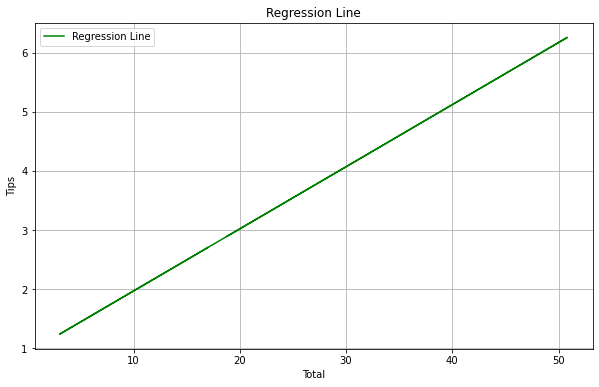

In [30]:
m, c = np.polyfit(xo, y, 1) #Slope, intercept

plt.title ('Regression Line')
plt.xlabel ('Total')
plt.ylabel ('Tips')
plt.grid ()
plt.plot(xo, (m*xo + c), label='Regression Line', c='g')
plt.legend ()
plt.show ()

# Train - Test - Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=42)
print ('Shapes \nXtrain: {}, Xtest: {}, Ytrain: {}, Ytest: {} \nDimensions \nXtrain: {}, Xtest: {}, Ytrain: {}, Ytest: {}'.format (x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_train.ndim, x_test.ndim, y_train.ndim, y_test.ndim))

Shapes 
Xtrain: (170, 1), Xtest: (74, 1), Ytrain: (170,), Ytest: (74,) 
Dimensions 
Xtrain: 2, Xtest: 2, Ytrain: 1, Ytest: 1


In [32]:
model = LinearRegression ()
model.fit (x_train, y_train)
y_pred = model.predict (x_test)
print ("Prediction: \n", y_pred)

Prediction: 
 [3.03523096 1.83195547 3.5502982  3.69621577 2.29257586 2.8250661
 3.97389473 2.23595113 2.48640666 2.55174289 2.86862358 2.04974289
 2.03667564 2.45373855 1.97351729 2.90673638 2.91435894 3.22688388
 2.66825916 5.36228952 3.12996848 3.12561273 2.43522662 1.91689256
 3.15283616 2.1499251  1.99529603 3.62979061 2.6726149  6.12236761
 5.02254115 1.71979495 2.8163546  3.086411   2.72488388 3.49911816
 2.18694896 5.57136544 2.30999885 3.34557803 2.02143052 2.4580943
 3.48496197 2.00182966 2.00291859 1.21126133 2.03014202 2.91218106
 1.70019408 2.3230661  3.51980796 3.84757803 4.32997716 2.61707911
 2.99929603 2.29584267 1.66643703 2.81744354 2.75646306 2.58549994
 4.12743486 2.76190775 3.41744788 2.64865829 3.07987738 3.15501404
 2.51145221 1.66643703 3.77244137 3.54703139 3.02978627 3.94231555
 2.75972987 3.01671903]


### Evaluation

In [33]:
accuracy = r2_score (y_test, y_pred)
print ("Accuracy: {}%".format (accuracy*100))

Accuracy: 42.91782688312412%


In [34]:
df = pd.concat ([pd.DataFrame ({'Y': y_test}), pd.DataFrame ({'Y_pred': y_pred})], axis=1)
display (df)

,Y,Y_pred
0,3.18,3.035231
1,2.00,1.831955
2,2.00,3.550298
3,5.16,3.696216
4,2.00,2.292576
...,...,...
69,3.48,3.547031
70,2.00,3.029786
71,3.00,3.942316
72,2.71,2.759730


In [35]:
diff = []
y_pred = model.predict (x)
for i in range (len (y)):
    diff.append (y[i]-y_pred[i])
print (len (diff))
print (r2_score (y, y_pred))

244
0.4554172083989859


In [36]:
df_new = pd.concat ([pd.DataFrame ({'Y': y}), pd.DataFrame ({'Y_pred': y_pred}), pd.DataFrame ({'Difference': diff})], axis=1)
display (df_new)

,Y,Y_pred,Difference
0,1.01,2.727062,-1.717062
1,1.66,2.002919,-0.342919
2,3.50,3.164814,0.335186
3,3.31,3.455561,-0.145561
4,3.61,3.554654,0.055346
...,...,...,...
239,5.92,4.038142,1.881858
240,2.00,3.836689,-1.836689
241,2.00,3.345578,-1.345578
242,1.75,2.817444,-1.067444


In [37]:
df_new ['Difference'].mean ()

-0.0332436331411774